In [ ]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import backend as K
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/Genetic

/content/gdrive/MyDrive/Colab Notebooks/Genetic


In [ ]:
df= pd.read_csv('./input_output.csv')

In [ ]:
X= df[df.columns[:8]].values

In [ ]:
y= df[['Electricity:Facility','Photovoltaic:ElectricityProduced','ElectricityPurchased:Facility']].values

In [ ]:
# created scaler
scaler_x = StandardScaler()
# fit scaler on training dataset
scaler_x.fit(X)
# transform dataset
X_scaled = scaler_x.transform(X)

# created scaler
scaler_y = StandardScaler()
# fit scaler on training dataset
scaler_y.fit(y)
# transform dataset
y_scaled = scaler_y.transform(y)

In [ ]:
# split into train and test
n_train = 80
trainX, testX = X_scaled[:n_train, :], X_scaled[n_train:, :]
trainy, testy = y_scaled[:n_train], y_scaled[n_train:]

In [ ]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
# get the model
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(128, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(4,activation='relu'))
    #model.add(Dense(4,activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss=root_mean_squared_error, optimizer='adam')
#     model.compile(loss='mae', optimizer=SGD(lr=0.01, momentum=0.9))
    return model

Epoch 215/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6410
Epoch 216/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.6182
Epoch 217/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6262
Epoch 218/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6210
Epoch 219/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6351
Epoch 220/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6657
Epoch 221/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6203
Epoch 222/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6475
Epoch 223/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.6333
Epoch 224/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6325
Epoch 225/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.6305
Epoch 226/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6186
Epoch 227/1000
3/3 [====

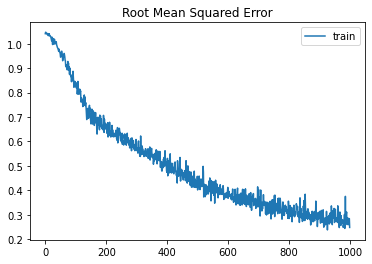

Epoch 1/1000
3/3 [==============================] - 1s 6ms/step - loss: 1.0024
Epoch 2/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.9953
Epoch 3/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.9973
Epoch 4/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.9909
Epoch 5/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.9916
Epoch 6/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.9870
Epoch 7/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.9856
Epoch 8/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.9912
Epoch 9/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.9780
Epoch 10/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.9874
Epoch 11/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.9876
Epoch 12/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.9828
Epoch 13/1000
3/3 [==============================

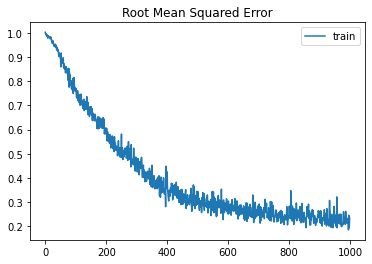

In [ ]:

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1

# Merge inputs and targets
inputs = np.concatenate((trainX, testX), axis=0)
targets = np.concatenate((trainy, testy), axis=0)


n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model

for train, test in kfold.split(inputs, targets):
    model = get_model(n_inputs, n_outputs)
    # fit the model on all data
    history= model.fit(X_scaled[train], y_scaled[train], verbose=1, epochs=1000)
    # evaluate the model
    train_mse = model.evaluate(X_scaled[train], y_scaled[train], verbose=0)
    test_mse = model.evaluate(X_scaled[test], y_scaled[test], verbose=0)

    print('Fold: %.1f, Train: %.3f, Test: %.3f' % (fold_no, train_mse, test_mse))
    # plot loss during training
    pyplot.title('Root Mean Squared Error')
    pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()
    # Increase fold number
    fold_no = fold_no + 1

In [ ]:
predicted_y= scaler_y.inverse_transform(model.predict(testX))

In [ ]:
# opt = [[1],[2],[3],[4],[5],[6],[7],[8]]

# # created scaler
# scaler_opt = StandardScaler()
# # fit scaler on training dataset
# scaler_opt.fit(opt)
# # transform dataset
# opt_scaled = scaler_opt.transform(opt)


In [ ]:
import matplotlib.pyplot as plt

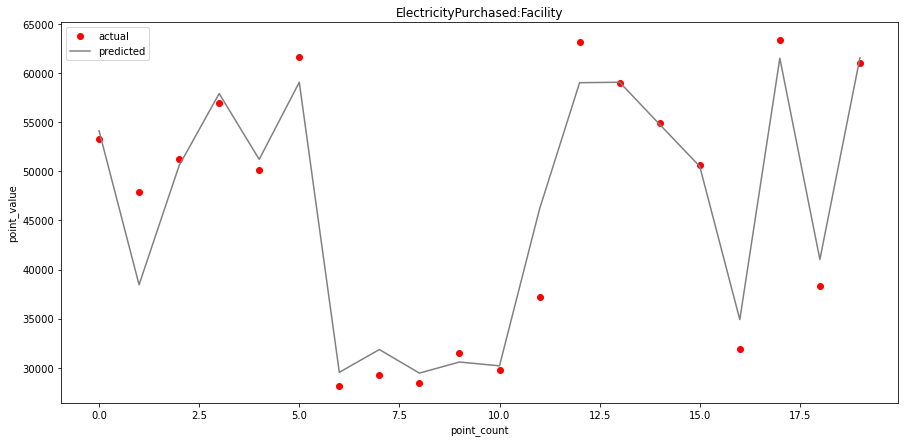

In [ ]:
# g=plt.scatter(y[:,1],predicted_y[:,1])
#'Electricity:Facility','Photovoltaic:ElectricityProduced','ElectricityPurchased:Facility'
plt.rcParams["figure.figsize"] = (15,7)
plt.title('ElectricityPurchased:Facility')
plt.xlabel('point_count')
plt.ylabel('point_value')
plt.plot(scaler_y.inverse_transform(testy)[:,2], 'or',label='actual')
plt.plot(predicted_y[:,2], '-', color='gray',label='predicted')
plt.legend()
plt.show()

In [ ]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=0, epochs=100)
        # evaluate model on test set
        mae = model.evaluate(X_test, y_test, verbose=0)
        # store result
        print('>%.3f' % mae)
        results.append(mae)
    return results
# # evaluate model
# results = evaluate_model(X, y)
# # summarize performance
# print('MAE: %.3f (%.3f)' % (mean(results), std(results)))